In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

from acquire import get_telco_data
from prepare import prep_telco_data

# Questions

What services churn more?

Which contracts churn more?

Is churn related to cost for service?

Who is likely to churn?

Importing Data/Cleaning Data

In [6]:
telco_original = get_telco_data()
telco_original




,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [7]:
telco = prep_telco_data()
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,0,0,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,0,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [45]:
telco.dtypes

gender                                    object
senior_citizen                             int64
partner                                   object
dependents                                object
tenure                                     int64
phone_service                             object
multiple_lines                            object
online_security                           object
online_backup                             object
device_protection                         object
tech_support                              object
streaming_tv                              object
streaming_movies                          object
paperless_billing                         object
monthly_charges                          float64
total_charges                            float64
churn                                     object
contract_type                             object
internet_service_type                     object
payment_type                              object
gender_encoded      

In [5]:
# What services churn more?
telco.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
64     80
52     80
25     79
26     79
61     76
65     76
60     76
14     76
46     74
19     73
63     72
29     72
27     72
30     72
20     71
62     70
53     70
41     70
32     69
51     68
54     68
50     68
47     68
58     67
49     66
31     65
42     65
57     65
43     65
37     65
34     65
33     64
48     64
55     64
40     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
Name: tenure, dtype: int64

In [9]:
telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64

Text(0.5, 0, 'Churned')

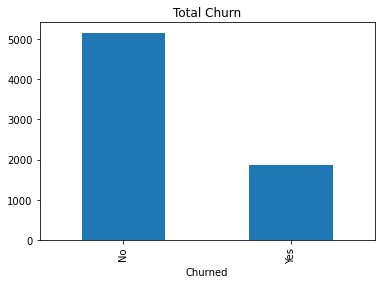

In [15]:
telco.churn.value_counts().plot.bar()
plt.title("Total Churn")
plt.xlabel('Churned')

In [59]:
round(telco.churn_encoded.mean(), 2)

0.27

Findings:

27% churn overall at Telco

[Text(0.5, 1.0, 'Fiber Optic Has Large Churn')]

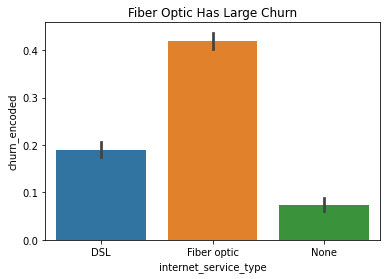

In [51]:
sns.barplot('internet_service_type', 'churn_encoded', data=telco).set(title='Fiber Optic Has Large Churn')



[Text(0.5, 1.0, 'Fiber Optic Has Large Churn Pt.2')]

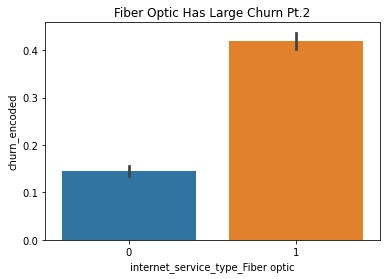

In [131]:
sns.barplot('internet_service_type_Fiber optic', 'churn_encoded', data=telco).set(title='Fiber Optic Has Large Churn Pt.2')



Findings:


Fiber optic has much more churn than DSL or non-internet customers

[Text(0.5, 1.0, 'Phone Service Has Close Churn')]

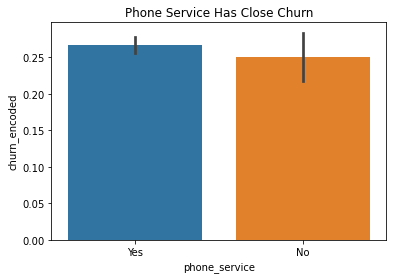

In [82]:
sns.barplot('phone_service', 'churn_encoded', data=telco).set(title='Phone Service Has Little Difference In Churn')



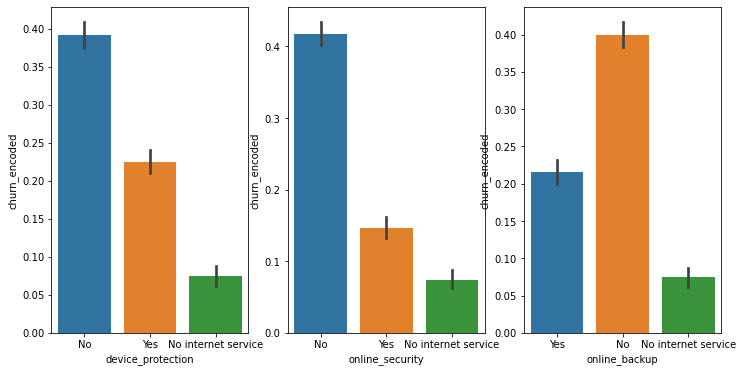

In [112]:
features = ['device_protection','online_security', 'online_backup']
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.barplot(
        feature,
        "churn_encoded",
        data=telco,
        ax=ax[i],
    )

Findings:

Device protection, online security and online backup have a low amount of churn


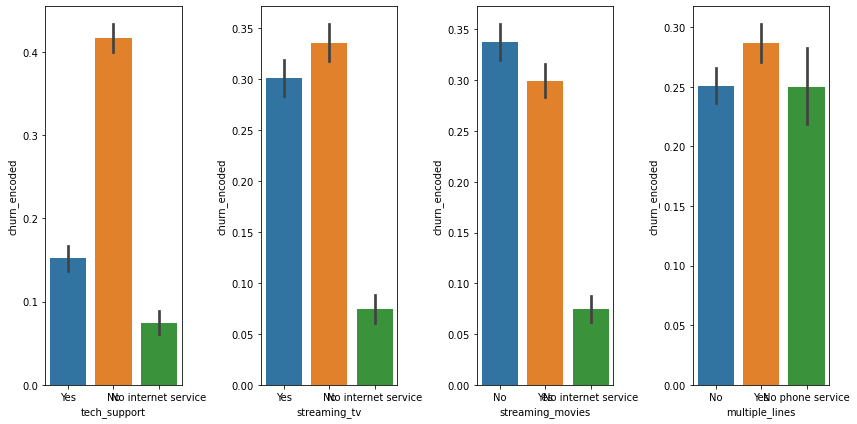

In [119]:
features = ['tech_support','streaming_tv', 'streaming_movies', 'multiple_lines']
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.barplot(
        feature,
        "churn_encoded",
        data=telco,
        ax=ax[i],
    )

    plt.tight_layout()

Findings:

Customers who have tech support have low churn

streaming services don't seem to have much variance in churn

Multiple line users don't also don't have much variance in churn

Which contract types have more churn?

[Text(0.5, 1.0, 'Phone Service Has Close Churn')]

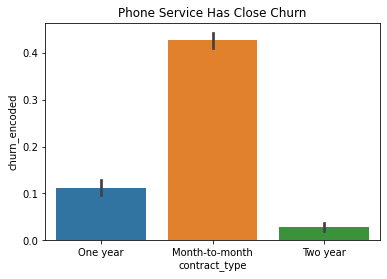

In [83]:
sns.barplot('contract_type', 'churn_encoded', data=telco).set(title='Month to Month Has Large Churn')

Month to Month has a large amount of churn in comparison to other contract types

In [85]:
telco.tenure.value_counts()


1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
64     80
52     80
25     79
26     79
61     76
65     76
60     76
14     76
46     74
19     73
63     72
29     72
27     72
30     72
20     71
62     70
53     70
41     70
32     69
51     68
54     68
50     68
47     68
58     67
49     66
31     65
42     65
57     65
43     65
37     65
34     65
33     64
48     64
55     64
40     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
Name: tenure, dtype: int64

In [87]:
telco.tenure.max()

72

(array([1724.,  735.,  561.,  538.,  473.,  444.,  452.,  495.,  501.,
        1109.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

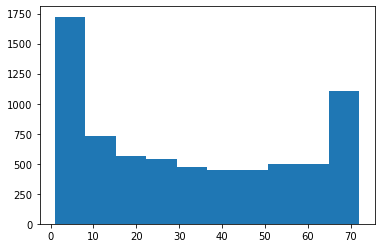

In [109]:
plt.hist(telco.tenure)



Findings

customers mostly churned early or stayed with the company for long periods of time

Is churn related to cost for service?

In [100]:
telco.monthly_charges.mean()

64.7982081911263

In [105]:
telco.groupby('churn').monthly_charges.mean()
#Churning customers are paying more monthly

churn
No     61.307408
Yes    74.441332
Name: monthly_charges, dtype: float64

Who is likely to churn?

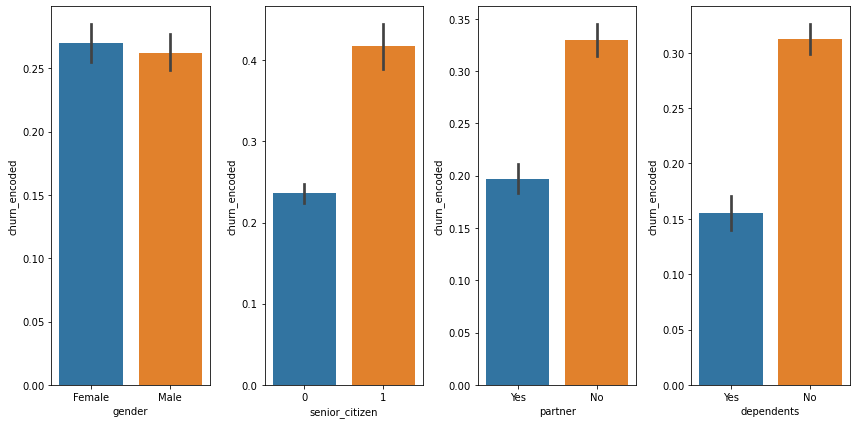

In [121]:
features = ['gender','senior_citizen', 'partner', 'dependents']
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.barplot(
        feature,
        "churn_encoded",
        data=telco,
        ax=ax[i],
    )

    plt.tight_layout()

Findings:


Gender plays no or little role in churn.

Senior citizens seem to have a large churn amount

people with partners and dependents tend to churn less

# Statistical Analysis

In [122]:
alpha = .05

## Internet services and options

### Fiber Optics 

H0: Churn is not dependent on fiber optic internet
H1: Churn is dependent on fiber optic internet

In [141]:


ct_fiber = pd.crosstab(telco['churn'], telco['internet_service_type_Fiber optic'])


chi2, p, degf, expected = stats.chi2_contingency(ct_fiber)

print('Observed\n')
print(ct_fiber.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[3364 1799]
 [ 572 1297]]
---
Expected

[[2889.87030717 2273.12969283]
 [1046.12969283  822.87030717]]
---

chi^2 = 663.3565
p     = 0.0000


In [129]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

We reject the null hypothesis.


In [146]:
ct_dp = pd.crosstab(telco['churn'], telco['device_protection_Yes'])


chi2, p, degf, expected = stats.chi2_contingency(ct_dp)

print('Observed\n')
print(ct_dp.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.10f}')


Observed

[[3290 1873]
 [1324  545]]
---
Expected

[[3387.66808874 1775.33191126]
 [1226.33191126  642.66808874]]
---

chi^2 = 30.4957
p     = 0.0000000335


In [148]:
ct_ts = pd.crosstab(telco['churn'], telco['tech_support_Yes'])


chi2, p, degf, expected = stats.chi2_contingency(ct_ts)

print('Observed\n')
print(ct_ts.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.10f}')

Observed

[[3433 1730]
 [1559  310]]
---
Expected

[[3665.20136519 1497.79863481]
 [1326.79863481  542.20136519]]
---

chi^2 = 189.9668
p     = 0.0000000000
